<a href="https://colab.research.google.com/github/larinsi/DS0P/blob/main/Machine_learning_Middle_level_Neural_networks/04_Convolutional_neural_networks_Pt1/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%BF%D0%BE_Conv2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика по Conv2D

In [1]:
import tensorflow as tf
import numpy as np
#tf.enable_eager_execution()
from tensorflow.keras.layers import Conv2D
from skimage import data
import matplotlib.pyplot as plt

(1, 512, 512, 1)


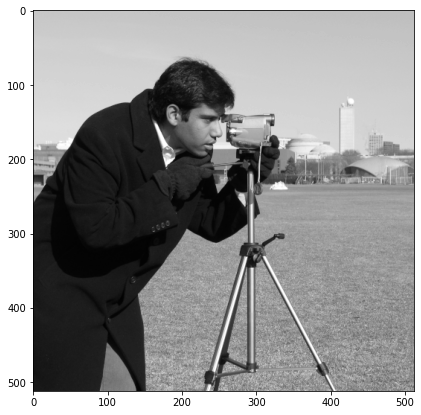

In [2]:
image = data.camera()
plt.figure(figsize=(7, 7))
plt.imshow(image, cmap="gray")
image = image[None, ..., None].astype(np.float32) / 255.
print(image.shape)

## Практическое задание 1

Реализуйте фильтр для детектирования вертикальных линий. Размер изображения не должен измениться.

Input shape (1, 512, 512, 1). Output shape (1, 512, 512, 1)
Tests passed


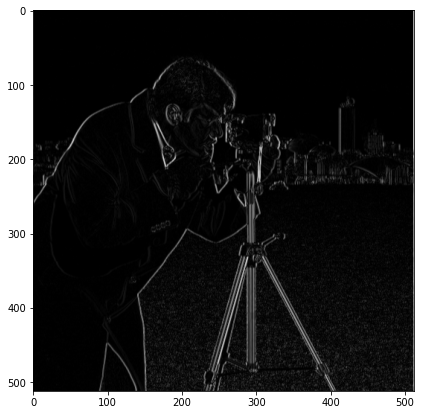

In [3]:
# < YOUR CODE STARTS HERE >
# 1. определите слой conv_layer так чтобы размер выходного изображения не изменился
conv_layer = Conv2D(filters=1, kernel_size=(3, 3), padding="same", use_bias=False)
# 2. примените его к image для инициализации
_ = conv_layer(image)
# 3. определите kernel = [[1, 0, -1], [2, 0, -2], [1, 0, -1]] . 
kernel = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])
# 4. не забудьте задать ему правильный размер
kernel = kernel.reshape(3, 3, 1, 1).astype(np.float32)
# 5. conv_layer.set_weights([kernel])
conv_layer.set_weights([kernel])
# После этого вы получите изображение с задетектированными линиями
# < YOUR CODE ENDS HERE >
detected_lines = conv_layer(image)
plt.figure(figsize=(7, 7))
plt.imshow(np.abs(detected_lines.numpy()[0, :,:, 0]), cmap="gray")
print(f"Input shape {image.shape}. Output shape {conv_layer(image).numpy().shape}")
assert image.shape  == detected_lines.shape
print("Tests passed")

## Практическое задание 2

Реализуйте свертку, которая повысит резкость цветного изображения и не изменит его размер.

Это делается с помощью такого фильтра:



```
[[0, -1, 0], 
[-1, 5, -1], 
[0, -1, 0]]
```



(1, 400, 600, 3)


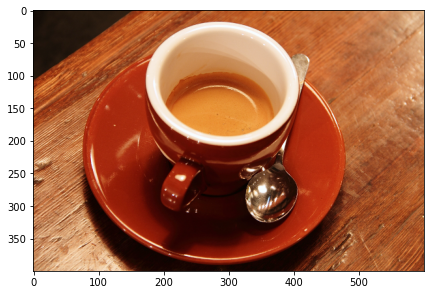

In [4]:
image = data.coffee()
plt.figure(figsize=(7, 7))
plt.imshow(image, cmap="gray")
image = image[None, ...].astype(np.float32) / 255.
print(image.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Input shape (1, 400, 600, 3). Output shape (1, 400, 600, 3)
Tests passed


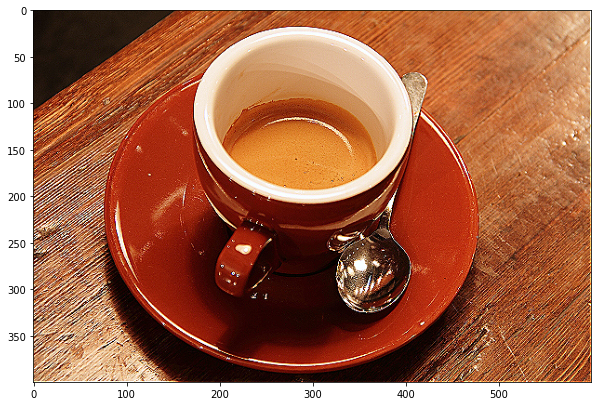

In [12]:
# < YOUR CODE STARTS HERE >
# 1. определите слой conv_layer так чтобы размер выходного изображения не изменился
conv_layer = Conv2D(3, kernel_size=(3, 3), padding="same", use_bias=False)
# 2. примените его к image для инициализации
_ = conv_layer(image)
# 3. определите sharpen_kernel_2d= [[0, -1, 0], 
#                                   [-1, 5, -1], 
#                                   [0, -1, 0]]
sharper_kernel_2d = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]]).astype(np.float32)
# 4. По аналогии с размытием  цветного изображения сделайте так, чтобы этот фильтр 
#    применился к каждом каналу независимо определив переменную kernel размера (3,3,3,3). Там должно быть много нулей
kernel = np.zeros((3, 3, 3, 3))
kernel[:, :, 0, 0] = sharper_kernel_2d
kernel[:, :, 1, 1] = sharper_kernel_2d
kernel[:, :, 2, 2] = sharper_kernel_2d
# 5. conv_layer.set_weights([kernel])
conv_layer.set_weights([kernel])
# После этого вы получите изображение повышенной резкостью 
# < YOUR CODE ENDS HERE >
sharpen_image = conv_layer(image).numpy()
plt.figure(figsize=(10, 10))
plt.imshow(sharpen_image[0])
print(f"Input shape {image.shape}. Output shape {sharpen_image.shape}")
assert image.shape  == sharpen_image.shape
print("Tests passed")